<a href="https://colab.research.google.com/github/exception420/files/blob/main/american_universities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center >ANALYSIS OF AMERICAN UNIVERSITIES</center >
# <center >WHAT MAKES A STUDENT PREFER A UNIVERSITY?</center >

The aim of this project is to find out which are the most relevant features that students consider to choose the preferred American university. Some of the essential questions for developing this project are related to the number of applications, admissions, and enrollments, cost of tuition and fees, cost of living on campus, types of degrees offered, and features of the states where universities are located (population and GDP).

The dataset used for this analysis was taken from https://www.kaggle.com/sumithbhongale/american-university-data-ipeds-dataset. It contains a plethora of information about American universities (that are not necessarily the top 10-20) in 2013.
Although this dataset does not contain information about all the first-ranked American universities, the patterns and insights extracted from it are highly representative of the whole behavior.
The dataset contains more than a thousand rows (universities) and 145 columns (features about those universities). Several of those features are out of the scope of this project.  Only the features that have information to answer the questions to achieve the goal of the project were deployed.
The most powerful tools for data analysis used in this project are the packages `Numpy` and `Pandas`, and to visualize and explore the data: `Matplotlib` and `Seaborn`.

## TABLE OF CONTENTS

### 1. Reading the Dataset.
This chapter presents the steps to read the dataset about American Universities.
       
### 2. Data Preparation: Cleaning and Formatting.
In all data-analysis projects, the data preparation step is not only necessary but also vital to find and handle features that could cause some problems while making the quantitative analysis, or that could lead to low efficient coding. According to Alivia Smith[1], this step usually takes up to 80% of the entire time of a data analysis project.
Therefore, missing, invalid, and inconsistent values have been addressed. 
Finally, this step presents a code for changing the format of column names.


### 3. Exploratory Data Analysis (EDA) and Visualization. Quantitative and qualitative analysis (Asking and Answering Questions).
Although in many cases, the exploratory data analysis and the quantitative and qualitative analysis are separated steps, in this specific project, they have been joined.
This step, previous to asking questions that could lead to reaching the project's aim, presents global-useful information about the different columns of the dataset. Some initial examinations were performed as a way of beginning finding patterns, creating hypotheses, and corroborating early assumptions. Later, deeper investigations were depicted as part of reaching the project's goal. 

#### Quantitative and qualitative analysis: Asking and Answering Questions.
The hypotheses and questions generated to develop this projects are:
1. Do universities with a high number of applications are the preferred ones by students?; in other words, could the number of applications tell us that a university is one of the most preferred by students?. 
2. Do students prefer universities that have a high rate of admission?, in other words, do students prefer a university where it is easier for them to be admitted?.
3. Do students prefere public or private universities?
4. Do students prefer universities with low tuition and fees?
5. Do students prefer a university for its low on-campus cost of living?
6. Do students prefer universities from highly populated states?
7. Do students prefer a university because it belongs to a state with a high GDP per capita?
8. Do students prefer a university based on the possibility of a higher, additional academic degree in the same university?



### 4. Inferences and Conclusions.
Although all conclusions and answers are exposed in the previous section accordingly to each question, this section also presents, in a concise manner, the most significant insights.

### 5. Future Work.
This section reveals some compelling features or ideas to elaborate on or to consider for future works.

### 6. References.
All the sources that have been helpful to develop this project are exposed in this section.

## 1. READING THE DATASET

We're going to begin by importing all the packages we'll use in this project.

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#to center every figure in the notebook.
#from: https://stackoverflow.com/questions/18380168/center-output-plots-in-the-notebook
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

In [ ]:
with open('dataset.csv') as file:
    universities_df=pd.read_csv(file)

Because the file is a comma-separated value (CSV) file, we use the pandas function `pd.read_csv()` to open and read the file.

In [ ]:
type(universities_df)

pandas.core.frame.DataFrame

We have verified that the file has been created as a DataFrame variable. And we can see the first five rows of the dataset as a preview.

In [ ]:
universities_df.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,Offers Bachelor's degree,Offers Postbaccalaureate certificate,Offers Master's degree,Offers Post-master's certificate,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Offers Doctor's degree - other,Offers Other degree,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,SAT Writing 25th percentile score,SAT Writing 75th percentile score,ACT Composite 25th percentile score,ACT Composite 75th percentile score,"Estimated enrollment, total","Estimated enrollment, full time","Estimated enrollment, part time","Estimated undergraduate enrollment, total","Estimated undergraduate enrollment, full time","Estimated undergraduate enrollment, part time",...,Percent of undergraduate enrollment that are White,Percent of undergraduate enrollment that are two or more races,Percent of undergraduate enrollment that are Race/ethnicity unknown,Percent of undergraduate enrollment that are Nonresident Alien,Percent of undergraduate enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are American Indian or Alaska Native,Percent of graduate enrollment that are Asian,Percent of graduate enrollment that are Black or African American,Percent of graduate enrollment that are Hispanic/Latino,Percent of graduate enrollment that are Native Hawaiian or Other Pacific Islander,Percent of graduate enrollment that are White,Percent of graduate enrollment that are two or more races,Percent of graduate enrollment that are Race/ethnicity unknown,Percent of graduate enrollment that are Nonresident Alien,Percent of graduate enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of graduate enrollment that are women,Number of first-time undergraduates - in-state,Percent of first-time undergraduates - in-state,Number of first-time undergraduates - out-of-state,Percent of first-time undergraduates - out-of-state,Number of first-time undergraduates - foreign countries,Percent of first-time undergraduates - foreign countries,Number of first-time undergraduates - residence unknown,Percent of first-time undergraduates - residence unknown,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total",Percent of freshmen receiving any financial aid,"Percent of freshmen receiving federal, state, local or institutional grant aid",Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,Implied no,Implied no,Implied no,Yes,Implied no,Yes,Implied no,Yes,Implied no,Implied no,Implied no,6142.0,5521.0,1104.0,15.0,88.0,370.0,450.0,350.0,450.0,NaN,NaN,15.0,19.0,5024.0,4442.0,582.0,4055.0,3802.0,253.0,...,3.0,0.0,1.0,0.0,0.0,51.0,0.0,2.0,81.0,1.0,0.0,15.0,0.0,1.0,0.0,2.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,23.0,29.0,9

## 2. DATA TREATMENT: CLEANING AND FORMATTING    

Let's begin this step by looking at the shape (number of rows and columns) of the dataset.

In [ ]:
universities_df.shape

(1534, 145)

In [ ]:
print('The dataset contains {} rows and {} columns'.format(universities_df.shape[0],universities_df.shape[1]))

The dataset contains 1534 rows and 145 columns


Now, let's see some additional information. 

In [ ]:
universities_df.info(max_cols=len(universities_df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 145 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   ID number                                                                               1534 non-null   int64  
 1   Name                                                                                    1534 non-null   object 
 2   year                                                                                    1534 non-null   int64  
 3   ZIP code                                                                                1534 non-null   object 
 4   Highest degree offered                                                                  1534 non-null   object 
 5   County name                                                         

In this case, only three dtypes have been recognized: float64, int64, and object.

If we take a look at the number of non-null elements of each column we can see that many columns, for example the column `SAT Writing 75th percentile score`, contain several null or NaN values.

#### 2.1 Working with missing, incorrect, and invalid data

Missing, incorrect, and invalid data need to be addressed to avert possible misleading mathematical operations. There are pandas functions, for example mean(), that exclude NaN values by default; however, other numerical operations consider all values, including missing values, to perform those operations. This will lead to wrong results. Incorrect and invalid data will also result in wrong outcomes. For these reasons, it is vital to tackle these different types of data according to their case.

##### -Missing values (NaN values) 

Let's check the NaN values within the entire data frame. We will see a list of columns sorted according to the number of NaN values that they present.

In [ ]:
universities_df.isna().sum().sort_values(ascending=False)

Endowment assets (year end) per FTE enrollment (GASB)       1018
SAT Writing 75th percentile score                            820
SAT Writing 25th percentile score                            820
Number of first-time undergraduates - residence unknown      623
Percent of first-time undergraduates - residence unknown     623
                                                            ... 
Historically Black College or University                       0
Tribal college                                                 0
Degree of urbanization (Urban-centric locale)                  0
Carnegie Classification 2010: Basic                            0
ID number                                                      0
Length: 145, dtype: int64

Now, let's see only the columns with 20% or more of NaN values.

In [ ]:
perc_nan=universities_df.isna().sum()/len(universities_df)*100

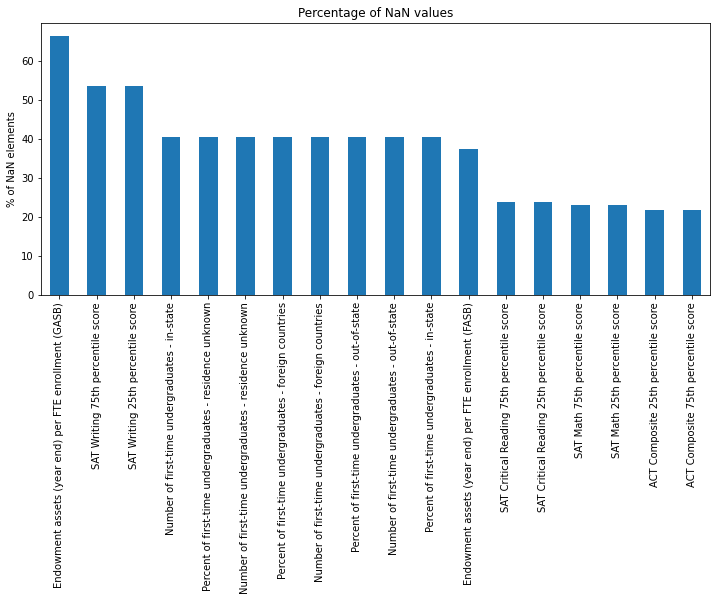

In [ ]:
ax=perc_nan[perc_nan>=20].sort_values(ascending=False).plot.bar(title='Percentage of NaN values',figsize=(12,5));
ax.set_ylabel('% of NaN elements');

In [ ]:
colum_off=universities_df.isna().sum()[universities_df.isna().sum()>=(0.2*len(universities_df))]
list_colum_off=colum_off.index.to_list()

All columns containing 20% of NaN values or more will be removed since those columns cannot be used as representative values. But before removing them, I'll create a copy of the data frame, and I'll continue working on this new data frame.

In [ ]:
universitiesnw_df=universities_df.copy()

In [ ]:
universitiesnw_df.drop(list_colum_off,axis=1,inplace=True)

From the remaining columns, only those that are related to the goal of this project will be selected to continue working on them.

In [ ]:
interesting_columns=['Name', 'year', 'Highest degree offered', "Offers Bachelor's degree",
       "Offers Master's degree",
       "Offers Doctor's degree - research/scholarship",
       "Offers Doctor's degree - professional practice", 'Applicants total',
       'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'State abbreviation', 'Control of institution', 'Total  enrollment',
       'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 years, total',
       'Graduation rate - Bachelor degree within 5 years, total',
       'Graduation rate - Bachelor degree within 6 years, total',
       ]

In [ ]:
universitiesnw_df=universitiesnw_df[interesting_columns]

Now, some rows that contain a plethora of NaN values will also been removed.

In [ ]:
universitiesnw_df[universitiesnw_df['Total  enrollment'].isna()][['Name','Applicants total','Admissions total','Enrolled total','Total  enrollment']]

,Name,Applicants total,Admissions total,Enrolled total,Total enrollment
257,University of North Georgia,NaN,NaN,NaN,NaN
1308,Texas A & M University-Galveston,NaN,NaN,NaN,NaN


In [ ]:
a=universitiesnw_df[universitiesnw_df['Name']=='University of North Georgia'].index[0]
b=universitiesnw_df[universitiesnw_df['Name']=='Texas A & M University-Galveston'].index[0]
universitiesnw_df=universitiesnw_df.drop([a,b],axis=0)

In [ ]:
print('The data frame now has {} columns out of the {} original columns, and {} rows out of the {} original rows.'.format(universitiesnw_df.shape[1],universities_df.shape[1],universitiesnw_df.shape[0],universities_df.shape[0]))

The data frame now has 29 columns out of the 145 original columns, and 1532 rows out of the 1534 original rows.


##### -Invalid values

Now let's check if the data frame contains invalid values. These values can be more dangerous than missing values because they can produce errors that can be tricky to identify. First, we can try to find out if the data frame has negative values. It is supposed that, according to the context of this data frame, we will not find any negative value.

To perform this, we need to identify which columns contain numerical values. Only those columns will be assessed.

In [ ]:
col=universitiesnw_df.select_dtypes(include=['float64','int64']).columns

In [ ]:
lt=list()
for i in col:
    y=any(x < 0 for x in universitiesnw_df[i])
    if y==True:
        lt.append(y)
print('There are {} negative values in the data frame.'.format(len(lt)))

There are 0 negative values in the data frame.


Therefore, for this dataset, we do not need to be preoccupied with handling negative invalid values.

##### -Inconsistent values

In [ ]:
universitiesnw_df.describe()

,year,Applicants total,Admissions total,Enrolled total,"Estimated enrollment, total","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,Total enrollment,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
count,1532.0,1377.000000,1377.000000,1377.000000,1532.000000,1497.000000,1400.000000,1400.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1522.000000,1269.000000,1476.000000,1476.000000,1476.000000
mean,2013.0,6391.193174,3554.880174,1043.046478,7033.115535,20727.490314,34935.306429,38767.612857,7070.114230,5371.494125,1698.620104,5532.885117,1537.229112,4507.738903,1025.146214,57.911227,57.169514,63.109535,37.450542,49.788618,53.189024
std,0.0,8787.469171,4309.457606,1285.165519,9387.648898,12455.805360,13283.049319,10716.524007,9416.538854,7474.494963,2922.064160,7242.649546,2765.197979,6042.192662,2121.495422,11.784477,11.886220,14.147092,21.949856,20.256726,19.102511
min,2013.0,0.000000,0.000000,0.000000,68.000000,1032.000000,9768.000000,9768.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.0,1488.000000,950.000000,287.000000,1497.250000,8542.000000,22487.000000,31128.000000,1512.750000,1199.000000,167.000000,1328.000000,46.750000,1089.500000,87.000000,52.000000,52.000000,55.000000,20.000000,36.000000,40.000000
50%,2013.0,3350.000000,2056.000000,538.000000,3126.000000,20060.000000,34115.000000,37193.500000,3127.000000,2328.000000,671.000000,2487.500000,471.000000,2066.000000,320.500000,58.000000,57.000000,64.000000,34.000000,49.000000,52.500000
75%,2013.0,7016.000000,4203.000000,1246.000000,8376.000000,29992.000000,44835.750000,45907.500000,8376.250000,6080.750000,2062.500000,6394.000000,1737.000000,5207.500000,1082.250000,63.000000,62.000000,72.000000,52.250000,63.000000,66.000000
max,2013.0,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,77338.000000,50012.000000,40985.000000,51333.000000,29874.000000,40020.000000,37440.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


According to the description chart, there are some universities which, for example, in 2013, had 0 applications in total, 0 admissions in total, and 0 enrollments in total. These are inconsistent values, and they need to be handled.

Let's find the total number of entries with 0 value.

In [ ]:
total_zero=(universitiesnw_df[universitiesnw_df.loc[0:]==0]).count().sum()

In [ ]:
print('This data set contains {} zero values.'.format(total_zero))

This data set contains 395 zero values.


In the specific case of this data set, the entries with a zero value do not have sense; in fact, the most probable reason for them is that the information was not available at that time, but it doesn't mean they are 0. Therefore, I prefer to replace those entries with NaN values. In this way, if a pandas function is applied, none of those NaN values will be considered.

In [ ]:
universitiesnw_df.replace(0,np.nan,inplace=True)

In [ ]:
total_zero_nw=universitiesnw_df[universitiesnw_df.loc[0:]==0].count().sum()

In [ ]:
print('This data set contains {} zero values.'.format(total_zero_nw))

This data set contains 0 zero values.


In [ ]:
universitiesnw_df[['Name','Applicants total']].sort_values('Applicants total').head()

,Name,Applicants total
1343,Goddard College,4.0
331,Shimer College,28.0
1500,Trine University-Regional/Non-Traditional Camp...,33.0
1479,Brandman University,34.0
1046,Marylhurst University,36.0


According to the chart above, in the case of the column `Applicants total`, the possible inconsistent value belongs to Goddard College: `Applicants total=4`. However, if we search a little more about this university, we'll find that this number of applications is, in fact, consistent with their data over the years. This is corroborated with the data found in:  
https://www.collegefactual.com/colleges/goddard-college/applying/entering-class-stats/

#### 2.2 Giving format

Now, in order to use the column names as properties and take advantage of it, it's necessary to remove some special characters that some column names contain, for example, apostrophe `'`, hyphen `-`, quotation marks `"`, colon `:`, and slash `/`. Also, some column names contain spaces between their words; these spaces will be removed as well.

In [ ]:
universitiesnw_df.columns

Index(['Name', 'year', 'Highest degree offered', 'Offers Bachelor's degree',
       'Offers Master's degree',
       'Offers Doctor's degree - research/scholarship',
       'Offers Doctor's degree - professional practice', 'Applicants total',
       'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'State abbreviation', 'Control of institution', 'Total  enrollment',
       'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 yea

In [ ]:
def remove_space(list_headers,charact): #charact should be: charact=[' - ',' ']
    new_headers=list()
    for header in list_headers:
        for char in charact:      
            if char in header:
                header=header.replace(char,'_')
            header=header
        new_headers.append(header)
    return new_headers

In [ ]:
def remove_sp_char(headers,chars):
    new_headers=list()
    for header in headers:    
        for char in chars:
            if char=='-' or char=='/':
                header=header.replace(char,'_')
            if char in header:
                header=header.replace(char,'')
            
            header=header   
        new_headers.append(header)
    return new_headers    

Besides removing spaces and replacing special characters, I'll change capitalized letters to avoid a typo of this kind.

In [ ]:
headers=remove_space(universitiesnw_df.columns,[' - ',' '])

In [ ]:
headers=remove_sp_char(headers,["'",',',':','-','/'])

In [ ]:
list_new_header=list()

for header in headers:
    header=header.casefold()   # All capitalized letters are changed.
    
    if "degrese" in header:    # One column name has a typo.  
        header=header.replace("degrese",'degrees')
            
    list_new_header.append(header)

The next step is to replace the original column names with the new ones, which have the desired format.

In [ ]:
universitiesnw_df.columns=list_new_header

In [ ]:
universitiesnw_df.columns

Index(['name', 'year', 'highest_degree_offered', 'offers_bachelors_degree',
       'offers_masters_degree', 'offers_doctors_degree_research_scholarship',
       'offers_doctors_degree_professional_practice', 'applicants_total',
       'admissions_total', 'enrolled_total', 'estimated_enrollment_total',
       'tuition_and_fees_2013_14',
       'total_price_for_in_state_students_living_on_campus_2013_14',
       'total_price_for_out_of_state_students_living_on_campus_2013_14',
       'state_abbreviation', 'control_of_institution', 'total__enrollment',
       'full_time_enrollment', 'part_time_enrollment',
       'undergraduate_enrollment', 'graduate_enrollment',
       'full_time_undergraduate_enrollment',
       'part_time_undergraduate_enrollment',
       'percent_of_total_enrollment_that_are_women',
       'percent_of_undergraduate_enrollment_that_are_women',
       'percent_of_graduate_enrollment_that_are_women',
       'graduation_rate_bachelor_degree_within_4_years_total',
       '

For convenience, the name of the column `state_abbreviation` will be replaced by just `state`.

In [ ]:
universitiesnw_df.rename(columns={'state_abbreviation':'state'}, inplace=True)

In [ ]:
universitiesnw_df[['state']].head(2)

,state
0,Alabama
1,Alabama


## 3. Exploratory Data Analysis (EDA) and Visualization. Quantitative and qualitative analysis (Asking and Answering Questions).

To find insight from our dataset, we'll explore its variables. This exploratory analysis will help us to understand how the variables interact and how representative they are. In the end, it'll help us to formulate hypotheses to reach the goal of the project and think about future works. 

In [ ]:
matplotlib.rcParams['figure.facecolor']='whitesmoke'

Let's begin this step by looking for information about each column.

In [ ]:
from IPython.display import display
with pd.option_context('display.max_columns',None):
    display(universitiesnw_df.describe())

,year,applicants_total,admissions_total,enrolled_total,estimated_enrollment_total,tuition_and_fees_2013_14,total_price_for_in_state_students_living_on_campus_2013_14,total_price_for_out_of_state_students_living_on_campus_2013_14,total__enrollment,full_time_enrollment,part_time_enrollment,undergraduate_enrollment,graduate_enrollment,full_time_undergraduate_enrollment,part_time_undergraduate_enrollment,percent_of_total_enrollment_that_are_women,percent_of_undergraduate_enrollment_that_are_women,percent_of_graduate_enrollment_that_are_women,graduation_rate_bachelor_degree_within_4_years_total,graduation_rate_bachelor_degree_within_5_years_total,graduation_rate_bachelor_degree_within_6_years_total
count,1532.0,1376.000000,1376.000000,1376.000000,1532.000000,1497.000000,1400.000000,1400.000000,1532.000000,1530.000000,1507.000000,1522.000000,1269.000000,1519.000000,1495.000000,1529.000000,1518.000000,1268.000000,1457.000000,1468.000000,1469.000000
mean,2013.0,6395.837936,3557.463663,1043.804506,7033.115535,20727.490314,34935.306429,38767.612857,7070.114230,5378.515686,1726.798938,5569.237845,1855.819543,4546.317314,1050.517726,58.024853,57.320158,63.159306,37.938916,50.059946,53.442478
std,0.0,8788.972944,4309.957540,1285.324785,9387.648898,12455.805360,13283.049319,10716.524007,9416.538854,7476.855128,2937.942843,7252.465825,2939.482145,6053.531083,2141.386454,11.512998,11.533174,14.041089,21.668924,19.974502,18.790730
min,2013.0,4.000000,4.000000,2.000000,68.000000,1032.000000,9768.000000,9768.000000,66.000000,1.000000,2.000000,11.000000,1.000000,1.000000,2.000000,3.000000,8.000000,9.000000,1.000000,2.000000,2.000000
25%,2013.0,1491.750000,951.500000,287.000000,1497.250000,8542.000000,22487.000000,31128.000000,1512.750000,1200.750000,186.000000,1347.000000,216.000000,1119.500000,98.500000,52.000000,52.000000,55.000000,21.000000,36.000000,41.000000
50%,2013.0,3360.000000,2056.000000,538.000000,3126.000000,20060.000000,34115.000000,37193.500000,3127.000000,2331.500000,695.000000,2516.500000,728.000000,2087.000000,336.000000,58.000000,57.000000,64.000000,34.000000,49.000000,53.000000
75%,2013.0,7020.500000,4207.500000,1246.500000,8376.000000,29992.000000,44835.750000,45907.500000,8376.250000,6094.250000,2112.500000,6443.000000,2180.000000,5251.500000,1101.500000,63.000000,62.000000,72.000000,53.000000,63.250000,66.000000
max,2013.0,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,77338.000000,50012.000000,40985.000000,51333.000000,29874.000000,40020.000000,37440.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


It's interesting to see that in 2013 one university received around 72000 applications; whereas, another received only 4 applications in the same year. So, let's see which universities received the highest number of applications.

In [ ]:
high_app_df=universitiesnw_df[['name','applicants_total']].sort_values('applicants_total',ascending=False).head(20)

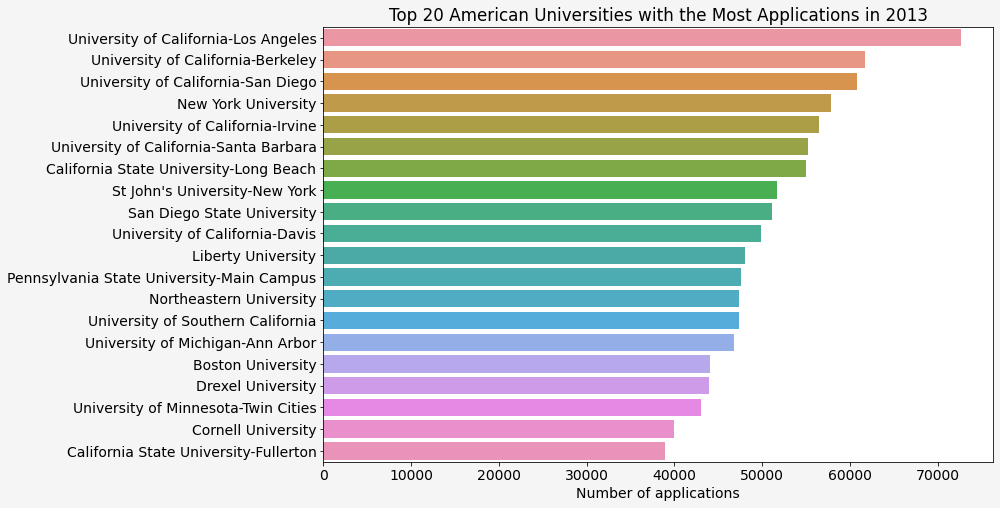

In [ ]:
plt.figure(figsize=(12,8))
matplotlib.rcParams['font.size']=14
sns.barplot(x='applicants_total',y='name',data=high_app_df)
plt.title('Top 20 American Universities with the Most Applications in 2013')
plt.xlabel('Number of applications')
plt.ylabel('');

We could think that the universities with the highest number of applications are the preferred ones by students. However, one student can send several applications at the same time, but only one university could be the preferred one; the other universities could be just in case of not being admitted to the preferred one. To find out if the universities with the most applications are the preferred ones, let's find some relationships with the number of admissions and enrollments.

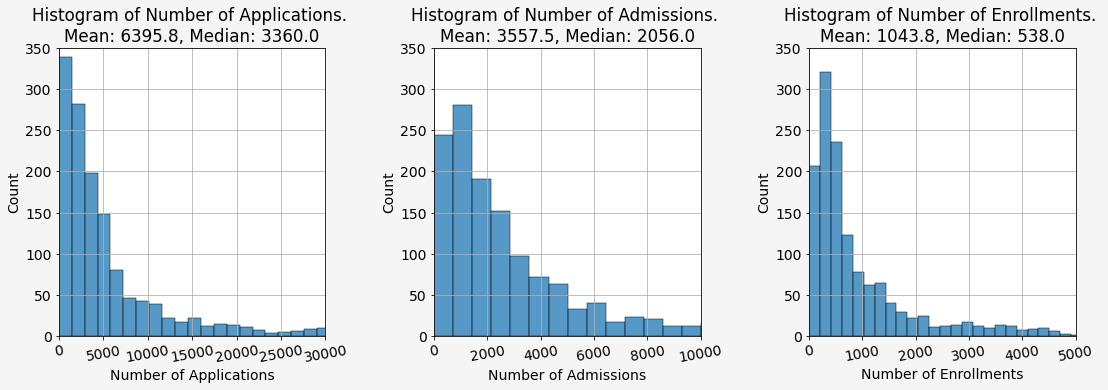

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
sns.histplot(universitiesnw_df.applicants_total,bins=50)
plt.title('''Histogram of Number of Applications. 
Mean: {:.1f}, Median: {:.1f}'''.format(universitiesnw_df.applicants_total.mean(),universitiesnw_df.applicants_total.median()));
plt.xlabel('Number of Applications')
plt.axis([0,30000,0,350])
plt.xticks(rotation=10)
plt.grid()

plt.subplot(1,3,2)
sns.histplot(universitiesnw_df.admissions_total,bins=50)
plt.title('''Histogram of Number of Admissions. 
Mean: {:.1f}, Median: {:.1f}'''.format(universitiesnw_df.admissions_total.mean(),universitiesnw_df.admissions_total.median()));
plt.axis([0,10000,0,350])
plt.xlabel('Number of Admissions')
plt.xticks(rotation=10)
plt.grid()

plt.subplot(1,3,3)
sns.histplot(universitiesnw_df.enrolled_total,bins=50)
plt.title('''Histogram of Number of Enrollments. 
Mean: {:.1f}, Median: {:.1f}'''.format(universitiesnw_df.enrolled_total.mean(),universitiesnw_df.enrolled_total.median()));
plt.axis([0,5000,0,350])
plt.xlabel('Number of Enrollments')
plt.grid()
plt.xticks(rotation=10)
plt.tight_layout(pad=2);

As we can see, the majority of universities received less than 5000 applications in 2013. However, some universities received a much higher number of applications, as many as 30000 applications in the same year.

We also can see that the average number of admissions is much lower than that of applications. The majority of universities admitted to less than 2000 students in 2013; however, some other universities presented a much higher number of admissions, more than 10000 admissions. As a high rate of admissions could represent a high possibility to be accepted, we could ask: ***Do students prefer universities with a high rate of admission?***

Talking about enrollments, we'll find lower numbers when compared to the number of applications and admissions. That happens because students usually apply to several universities at the same time, hoping that the favorite one admits them; however, when that is not the case, they still have other options.

For now, we have two closely-related questions: 
#### Q: Do universities with a high number of applications are the preferred ones by students?; in other words, could the number of applications tell us that a university is one of the most preferred by students?.
The second question: 
#### Q: Do students prefer universities that have a high rate of admission?, in other words, do students prefer a university where it is easier for them to be admitted?.

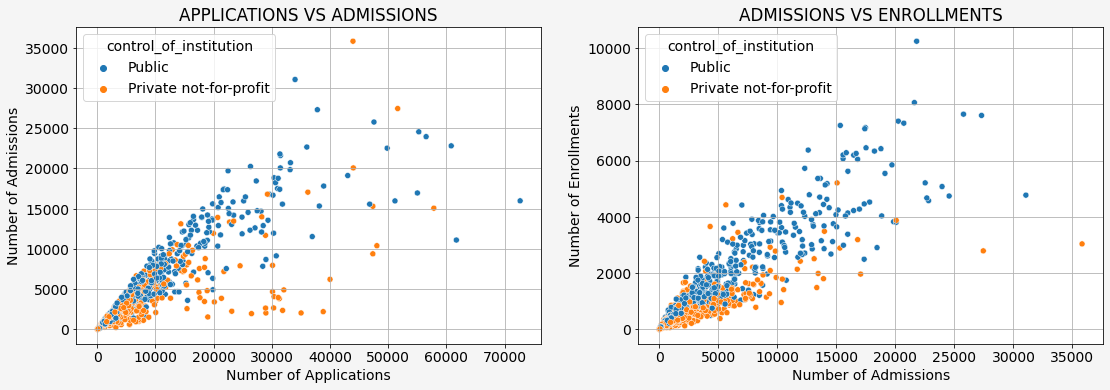

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('APPLICATIONS VS ADMISSIONS')
sns.scatterplot(y=universitiesnw_df.admissions_total,x=universitiesnw_df.applicants_total,hue=universitiesnw_df.control_of_institution)
plt.ylabel('Number of Admissions')
plt.xlabel('Number of Applications')
plt.grid()

plt.subplot(1,2,2)
plt.title('ADMISSIONS VS ENROLLMENTS')
sns.scatterplot(x='admissions_total',y='enrolled_total',data=universitiesnw_df,hue='control_of_institution')
plt.ylabel('Number of Enrollments')
plt.xlabel('Number of Admissions')
plt.grid()

plt.tight_layout(pad=2)

If we look at the left figure, we can see that, with a few exceptions, universities with a high number of applications also have a high number of admissions, and vice versa. However, the universities with the highest number of applications are not the ones with the highest number of admissions. Additionally, there is a batch of private universities with a high amount of applications, but their number of admissions is pretty low. 

If we look at the figure on the right, we can see that the higher the number of admissions, the higher the number of enrollments, too. However, it could be more meaningful to work with a rate of admissions or acceptance and an enrollment rate. 

Additionally, we should address the number of applications and admissions to the number of enrollments because if a student applies to several universities, is admitted to several universities, in the end, he will enroll only in the preferred one.

Let's find the acceptance rate and enrollment rate.

The acceptance rate will be based on the number of applications; whereas, the enrollment rate on the number of admissions. 

In [ ]:
universitiesnw_df['acceptance_rate']=(universitiesnw_df.admissions_total/universitiesnw_df.applicants_total*100).round(2)

In [ ]:
universitiesnw_df['enrollment_rate']=(universitiesnw_df.enrolled_total/universitiesnw_df.admissions_total*100).round(2)

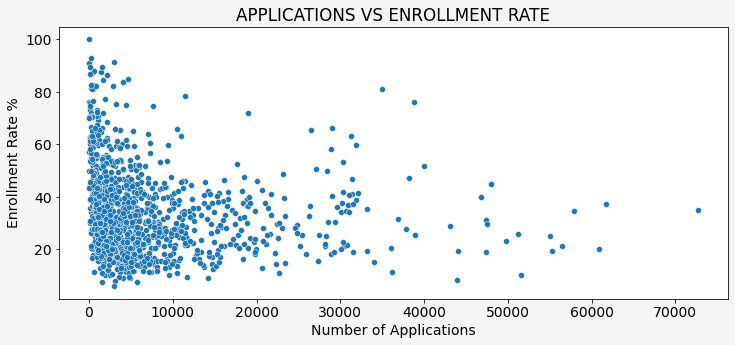

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='applicants_total',y='enrollment_rate',data=universitiesnw_df)
plt.title('APPLICATIONS VS ENROLLMENT RATE')
plt.ylabel('Enrollment Rate %')
plt.xlabel('Number of Applications');

This figure tells us that the universities which receive a lower number of applications are the ones with a higher enrollment rate. Obviously, there are some exceptions, but this is the strongest tendency. ***Consequently, we can say that a high number of applications does not mean that a university is preferred among students.***

Now, let's answer the inquiry about the number of admissions.

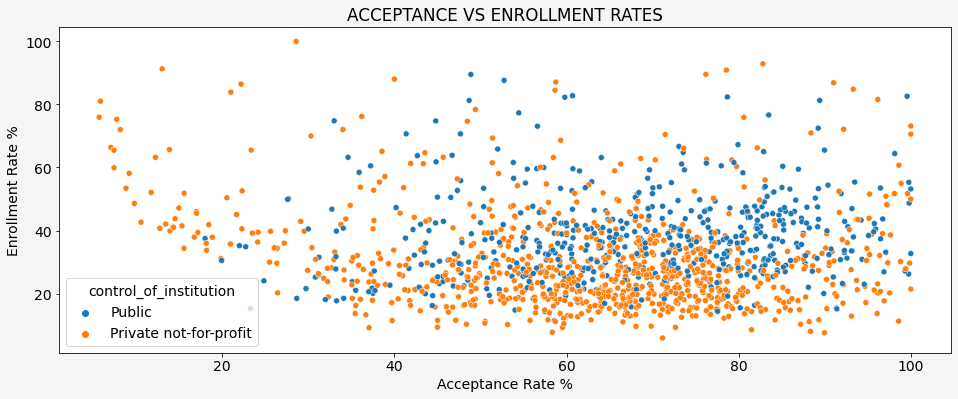

In [ ]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='acceptance_rate',y='enrollment_rate',data=universitiesnw_df,hue=universitiesnw_df.control_of_institution)
plt.title('ACCEPTANCE VS ENROLLMENT RATES')
plt.ylabel('Enrollment Rate %')
plt.xlabel('Acceptance Rate %');


We can see that for high acceptance rates, the enrollment rate vastly varies among public and private universities; nonetheless, there is a higher concentration where the enrollment rate is not high. That leads us to think that the acceptance rate is not a feature that strongly influences the student's preference for a university. On the other hand, we can see that the lower the acceptance rate is, the higher the enrollment rate will be. Therefore, ***students do not necessarily prefer a university because of its high acceptance rate or because it is easier for students to be admitted to a university.*** 
Additionally, it's interesting to spot that the universities with the lowest acceptance rate are private universities, and several of them have a high enrollment rate. Thereby, though it is difficult for students to be admitted to these private institutions when they are accepted, they enroll straightforwardly. This will be part of our next question.

To corroborate the last finding, let's take a closer look at representative universities.

In [ ]:
high_acceptance=universitiesnw_df[universitiesnw_df.acceptance_rate.notnull()][['name','acceptance_rate','enrollment_rate']].sort_values('acceptance_rate',ascending=False).head(25)

In [ ]:
low_acceptance=universitiesnw_df[universitiesnw_df.acceptance_rate.notnull()][['name','acceptance_rate','enrollment_rate']].sort_values('acceptance_rate',ascending=False).tail(25)

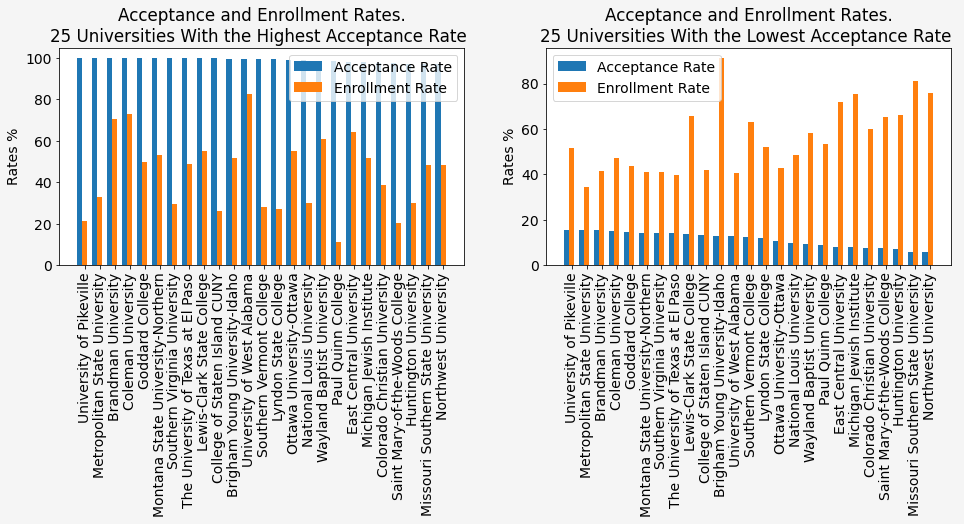

In [ ]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
ind = np.arange(len(high_acceptance)) #number of universities
width = 0.35       #space

plt.bar(ind, high_acceptance.acceptance_rate, width, label='Acceptance Rate')
plt.bar(ind + width, high_acceptance.enrollment_rate, width,label='Enrollment Rate')
plt.title('''Acceptance and Enrollment Rates.
25 Universities With the Highest Acceptance Rate ''')
plt.ylabel('Rates %')
plt.xticks(ind + width,high_acceptance.name.values,rotation=90 )
plt.legend(loc='best');

plt.subplot(1,2,2)
ind = np.arange(len(low_acceptance)) #number of universities
width = 0.35       #space

plt.bar(ind, low_acceptance.acceptance_rate, width, label='Acceptance Rate')
plt.bar(ind + width, low_acceptance.enrollment_rate, width,label='Enrollment Rate')
plt.title('''Acceptance and Enrollment Rates.
25 Universities With the Lowest Acceptance Rate ''')
plt.ylabel('Rates %')
plt.xticks(ind + width,high_acceptance.name.values,rotation=90 )
plt.legend(loc='best');


Now, we verified that there is no a clear pattern of enrollment rate when universities have a high acceptance rate.

In the case that universities have a low acceptance rate (more difficult to be admitted), again, there is no a specific pattern or tendency, but it is clear that the enrollment rate outnumbers the acceptance rate. Thereby, we can be sure that, in general, ***the students'preference is not based in how easy is for them to be admitted to a university.*** Again, there should be other most relevant features that influence the students' preference.

Another interesting feature that could influence on students is the type of university. 
#### Q: Do students prefer public or private universities?

To find out whether students prefer private or public universities, one approach could be by examining the number of applications accordingly to the type of university. 

In [ ]:
#spliting the number of applications according to the type of control: private or public.
uni_private_df=universitiesnw_df[universitiesnw_df.control_of_institution=='Private not-for-profit']
uni_private_df=uni_private_df[uni_private_df.applicants_total.notnull()]

uni_public_df=universitiesnw_df[universitiesnw_df.control_of_institution=='Public']
uni_public_df=uni_public_df[uni_public_df.applicants_total.notnull()]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


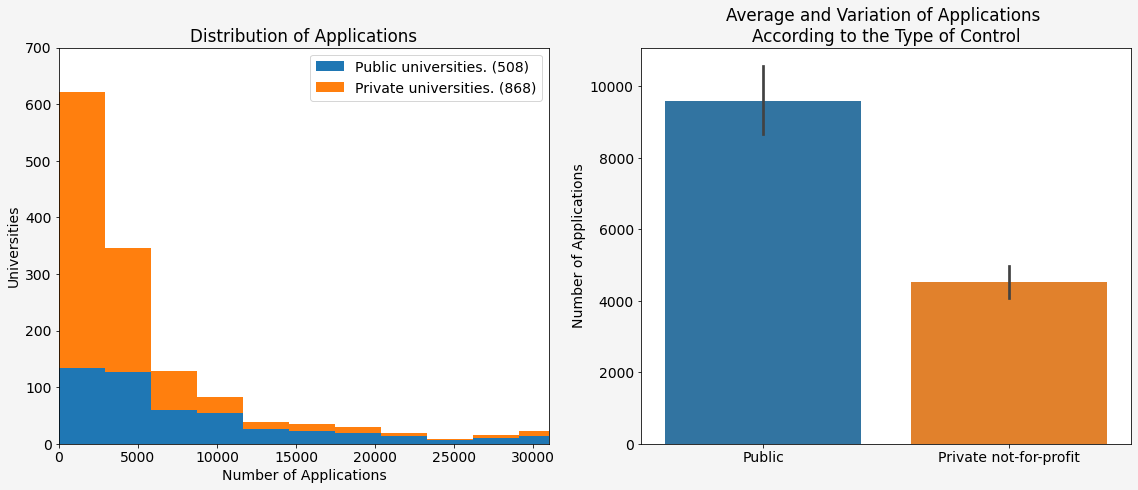

In [ ]:
plt.figure(figsize=(16,7))

plt.subplot(1,2,1)
plt.hist([uni_public_df.applicants_total,uni_private_df.applicants_total],stacked=True,bins=25)
plt.axis([0,31000,0,700])
plt.title('Distribution of Applications')
plt.xlabel('Number of Applications')
plt.ylabel('Universities')
plt.legend(['Public universities. ({})'.format(len(uni_public_df)),'Private universities. ({})'.format(len(uni_private_df))]);

plt.subplot(1,2,2)
sns.barplot(x=universitiesnw_df.control_of_institution,y=universitiesnw_df.applicants_total);
plt.title('''Average and Variation of Applications 
According to the Type of Control''')
plt.xlabel('')
plt.ylabel('Number of Applications');
plt.tight_layout(pad=1)

According to these figures, the average of applications that public universities received in 2013 is virtually double the average of applications received by private universities in the same year (for public universities: around 9000, for private universities: around 4000). At this point, it's important to highlight that the number of public universities in this dataset is 508 universities; whereas, the number of private ones is 868 universities.
The right figure shows us that the variation in the number of applications to public universities is much higher than that to private universities. But we need to remember that the average for public universities is so much higher than that for private universities. 

Before analyzing other features, let's find some interesting data that verifies the last conclusion.

Let's find the max and min values of applications for public and private universities.

In [ ]:
print('The minimum number of applications for private universities was {}; whereas, for public universities was {}.'.format(int(uni_private_df.applicants_total.min()),int(uni_public_df.applicants_total.min())))

The minimum number of applications for private universities was 4; whereas, for public universities was 193.


In [ ]:
print('The maximum number of applications for private universities was {}; whereas, for public universities was {}.'.format(int(uni_private_df.applicants_total.max()), int(uni_public_df.applicants_total.max())))

The maximum number of applications for private universities was 57845; whereas, for public universities was 72676.


Also, we could think about a relationship between the rate of enrollment and the inclination for public or private universities. Indeed, by using the enrollment rate as a reference of preference, the outcomes could be more meaningful.

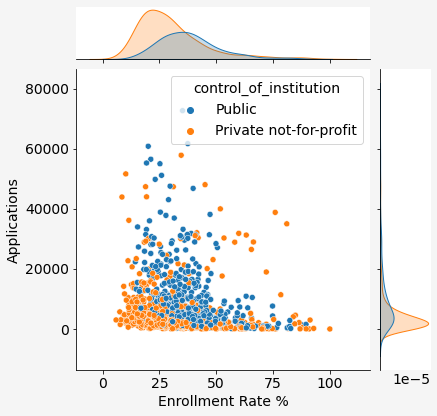

In [ ]:
g=sns.jointplot(x=universitiesnw_df.enrollment_rate,y=universitiesnw_df.applicants_total,hue=universitiesnw_df.control_of_institution,height=6);
g=(g.set_axis_labels("Enrollment Rate %","Applications"));

By analyzing the figure above, we can see that the enrollment rate, on average, is higher for public universities than the average for private universities. So, if we add this finding to the ones above, ***we can conclude that, in fact, there is a students' preference for public universities.***

Now, we could ask: 
#### Q: Do students prefer universities with low tuition and fees?

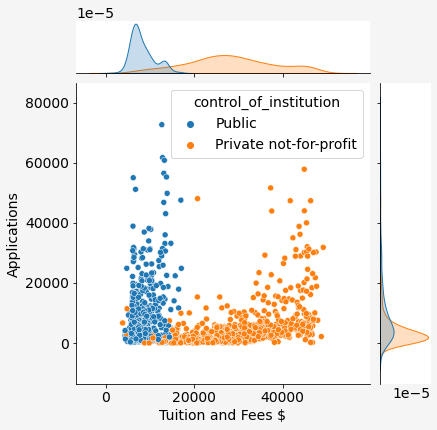

In [ ]:
g=sns.jointplot(x=universitiesnw_df.tuition_and_fees_2013_14,y=universitiesnw_df.applicants_total,hue=universitiesnw_df.control_of_institution,height=6);
g=(g.set_axis_labels("Tuition and Fees $","Applications"))

Looking at the figure above, we find that the most affordable universities receive the highest number of applications. This could make us think that there could be a relationship between the tuition and fees and the students' preference; however, we could endeavor to find a definite conclusion by analyzing tuition and fees and enrollment rates. 

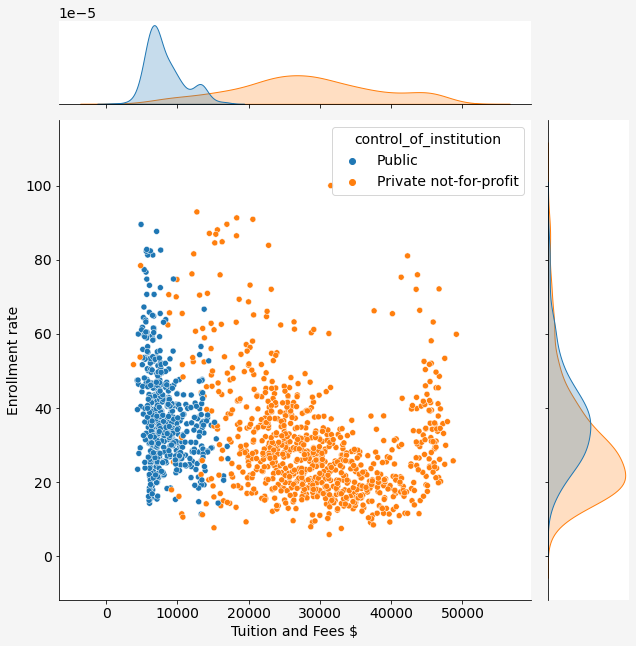

In [ ]:
g=sns.jointplot(x=universitiesnw_df.tuition_and_fees_2013_14,y=universitiesnw_df.enrollment_rate,hue=universitiesnw_df.control_of_institution,height=9);
g=(g.set_axis_labels('Tuition and Fees $','Enrollment rate'))

This figure shows us two main ideas. The first one is that public universities are more affordable than the majority of private universities. Second, there is a higher concentration from the middle to the left. If we look at the enrollment rate in this figure's region, we can see that affordable universities have higher enrollment rates than those of the most expensive universities. ***This leads us to think that, when it comes to tuition and fees, students prefer affordable universities.*** Additionally, if we remember the conclusion of the last finding of public universities then, now, we could say that ***we found the reason or one of the reasons for the students' preference for public universities. Public universities are much more affordable than the majority of private universities.***

The next question is related to the cost of living on campus. 

#### Q: Do students prefer a university for its low cost of on-campus living?.

Many students prefer living out of campus because it gives them other benefits; therefore, some of them do not choose a university for a low cost of on-campus living. This consideration should be contemplated in this dataset, but it's not. However, we'll assume that the majority of students do look for living on campus. 

This question could be addressed by finding a relationship with the type of university (public or private).

The dataset contains two columns related to the cost of on-campus living. One column displays the cost for in-state students, the other one for out-state students. So, first, we're going to analyze these two costs separately.

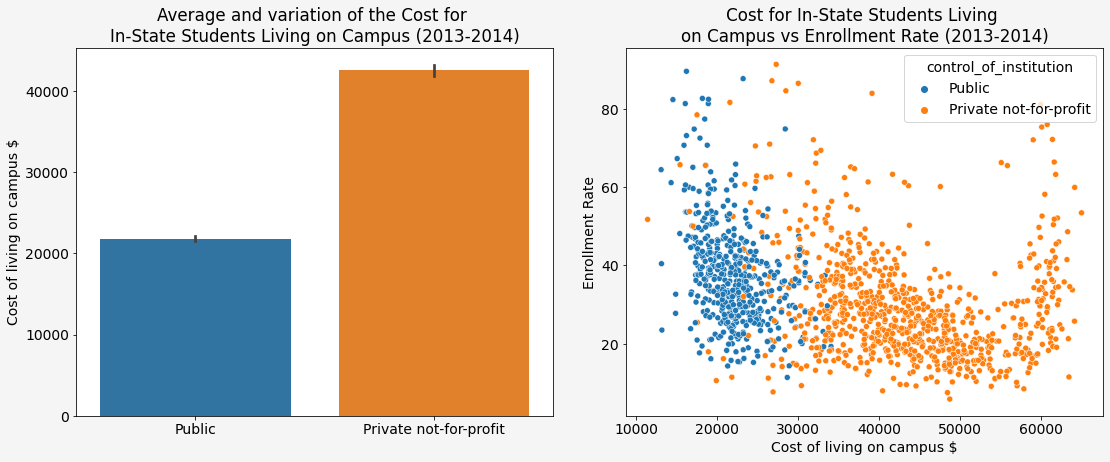

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.barplot(y=universitiesnw_df.total_price_for_in_state_students_living_on_campus_2013_14,x=universitiesnw_df.control_of_institution)
plt.title('''Average and variation of the Cost for 
In-State Students Living on Campus (2013-2014)''')        
plt.xlabel('')
plt.ylabel('Cost of living on campus $')


plt.subplot(1,2,2)
sns.scatterplot(x=universitiesnw_df.total_price_for_in_state_students_living_on_campus_2013_14,y=universitiesnw_df.enrollment_rate,hue=universitiesnw_df.control_of_institution);
plt.title('''Cost for In-State Students Living 
on Campus vs Enrollment Rate (2013-2014)''')
plt.xlabel('Cost of living on campus $')
plt.ylabel('Enrollment Rate')


plt.tight_layout(pad=2)

The first and most conspicuous insight that these figures show is that the majority of public universities offer a much more affordable cost for in-state students than private universities. In fact, the average cost in the case of public universities is half of that in the case of private universities.

Second, the right figure shows that high enrollment rates are more frequent when the cost is more affordable. This leads us to think that ***students, indeed, look for universities that offer an affordable cost of living on campus for in-state students.***

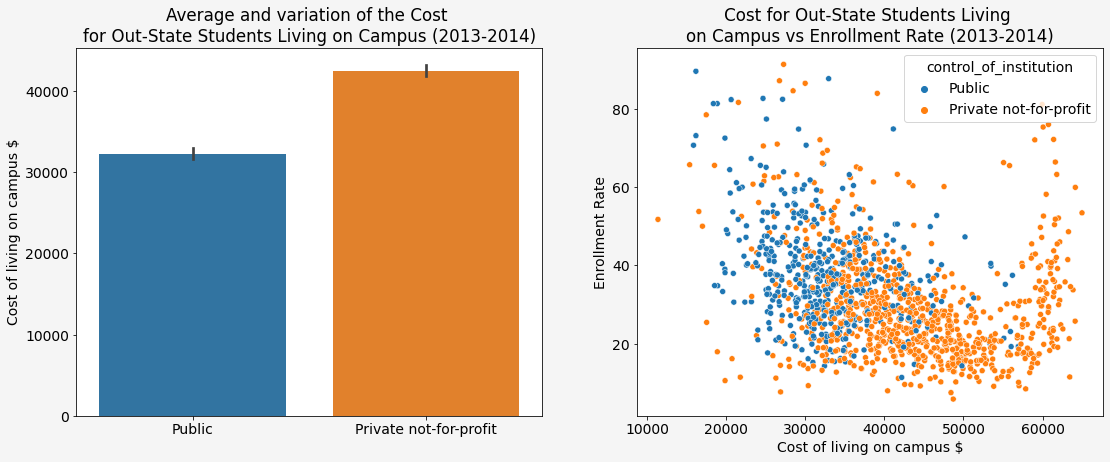

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,2)
sns.scatterplot(x=universitiesnw_df.total_price_for_out_of_state_students_living_on_campus_2013_14,y=universitiesnw_df.enrollment_rate,hue=universitiesnw_df.control_of_institution);
plt.title('''Cost for Out-State Students Living 
on Campus vs Enrollment Rate (2013-2014)''')
plt.xlabel('Cost of living on campus $')
plt.ylabel('Enrollment Rate')

plt.subplot(1,2,1)
sns.barplot(y=universitiesnw_df.total_price_for_out_of_state_students_living_on_campus_2013_14,x=universitiesnw_df.control_of_institution)
plt.title('''Average and variation of the Cost 
for Out-State Students Living on Campus (2013-2014)''')        
plt.xlabel('')
plt.ylabel('Cost of living on campus $')

plt.tight_layout(pad=2)

In the case of out-state students, the average cost in the case of public universities is, again, lower than that of private universities.

Additionally, for out-state students, we find a similar pattern as in the case of in-state students: high enrollment rates are more frequent among affordable costs. ***Therefore, students prefer universities that offer an affordable cost of living on campus for out-state students.***

Before analyzing the cost in line with states or regions, let's see if the above patterns have the same sense when we gather the costs of living for in-and-out-state students. Furthermore, I'll add a new column about the region where these universities locate. We'll be using this information later.

In [ ]:
region=pd.read_csv('region.csv')

In [ ]:
universitiesnw_df=universitiesnw_df.merge(region,on='state')

In [ ]:
in_state_df=universitiesnw_df[['name','enrollment_rate','total_price_for_in_state_students_living_on_campus_2013_14','control_of_institution','state','region']]
in_state_df=in_state_df.rename(columns={'total_price_for_in_state_students_living_on_campus_2013_14':'price_living'})
in_state_df['from']='In-State'

In [ ]:
out_state_df=universitiesnw_df[['name','enrollment_rate','total_price_for_out_of_state_students_living_on_campus_2013_14','control_of_institution','state','region']]
out_state_df=out_state_df.rename(columns={'total_price_for_out_of_state_students_living_on_campus_2013_14':'price_living'})
out_state_df['from']='Out-State'

In [ ]:
in_out_state_df=in_state_df.append(out_state_df,ignore_index = True)

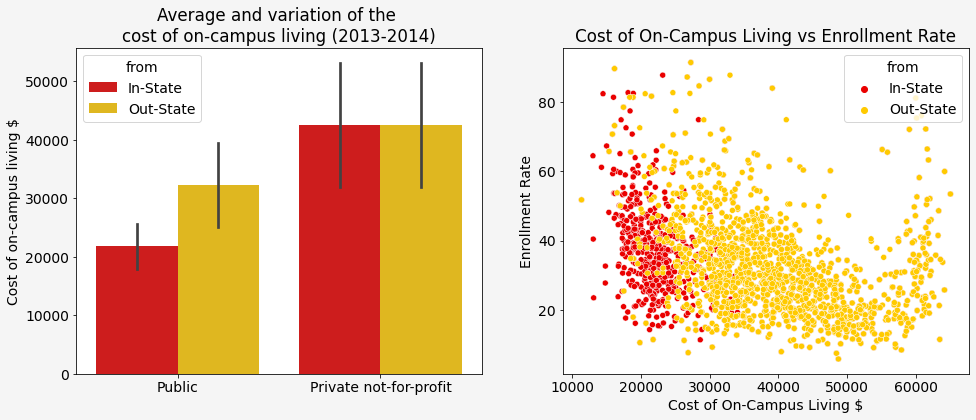

In [ ]:
plt.figure(figsize=(16,6))

#with standard deviation
plt.subplot(1,2,1)
sns.barplot(x='control_of_institution',y='price_living',data=in_out_state_df,hue='from',ci="sd",palette='hot');
plt.title('''Average and variation of the 
cost of on-campus living (2013-2014)''')
plt.xlabel('')
plt.ylabel('Cost of on-campus living $')

plt.subplot(1,2,2)
sns.scatterplot(x='price_living',y='enrollment_rate',data=in_out_state_df,hue='from',palette='hot')
plt.title('Cost of On-Campus Living vs Enrollment Rate')
plt.xlabel('Cost of On-Campus Living $')
plt.ylabel('Enrollment Rate');

In general, we had found that ***the average cost offered by public universities is lower than the cost offered by private universities***; the left figure verifies this. Now with all the costs side-by-side, we can elaborate on this by noting that ***in the case of public universities, the average cost for out-state students is much higher than that for in-state students. On the other hand, in the case of private universities, the average cost for in-state and out-state students is the same.***

Looking to the right image, again, we find high enrollment rates more frequently when costs are affordable. This tells us that, ***students, in general, prefer universities with affordable costs of on-campus living.***

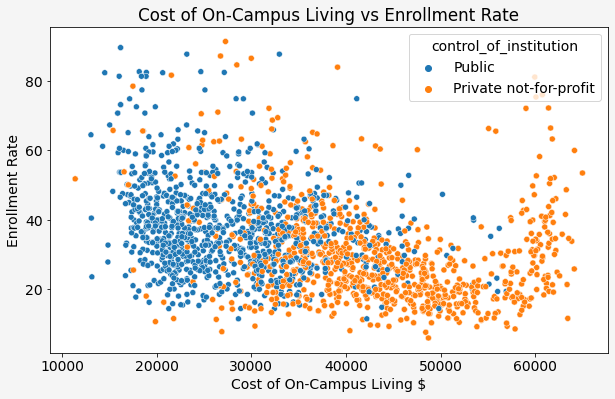

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price_living',y='enrollment_rate',data=in_out_state_df,hue='control_of_institution')
plt.title('Cost of On-Campus Living vs Enrollment Rate')
plt.xlabel('Cost of On-Campus Living $')
plt.ylabel('Enrollment Rate');

It could be interesting to see how the cost of on-campus living (for both in-state and out-state students) varies according to the region where the university locates. 

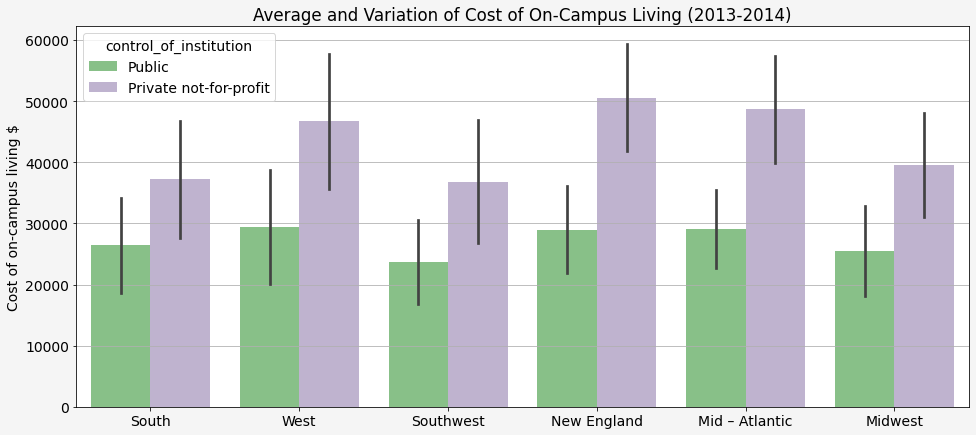

In [ ]:
plt.figure(figsize=(16,7))
sns.barplot(x='region',y='price_living',data=in_out_state_df,hue='control_of_institution',ci="sd",palette='Accent');
plt.title('Average and Variation of Cost of On-Campus Living (2013-2014)')
plt.grid(axis='y')
plt.xlabel('')
plt.ylabel('Cost of on-campus living $');

We can see that the highest average cost corresponds to private universities in New England, followed by Mid-Atlantic. And the lowest average cost belongs to public universities in the Southwest.

Now, we could wonder if students prefer a university for some characteristic of the state or region where the university belongs. For example, we could ask: 

#### Q: Do students prefer universities from highly populated states?

As a first step to answer this question, let's see a preview about the enrollment rate in each state.

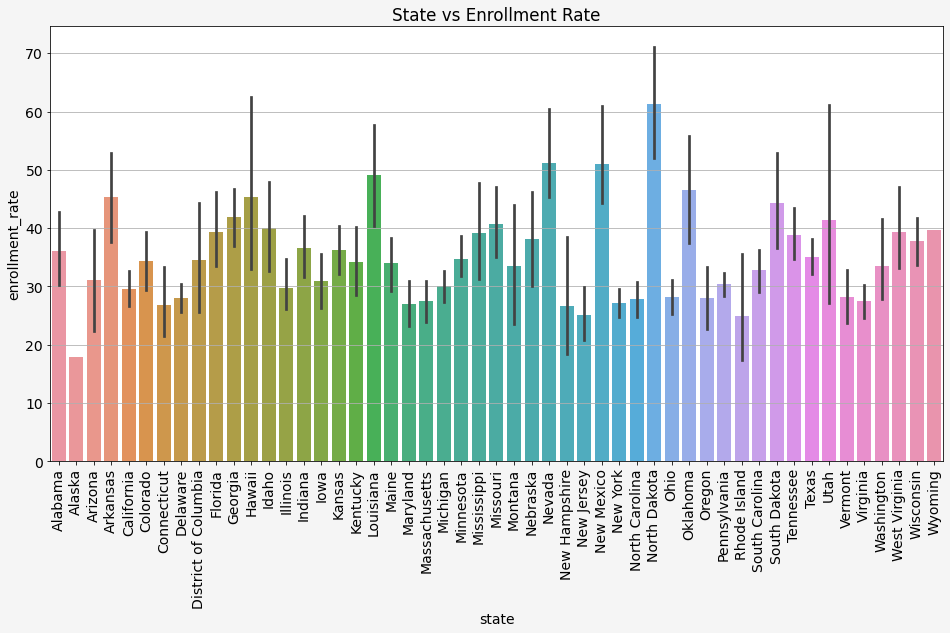

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x=universitiesnw_df.state,y=universitiesnw_df.enrollment_rate);
plt.title('State vs Enrollment Rate')
plt.grid(axis='y')
plt.xticks(rotation=90);

There is a vast fluctuation in enrollment rate among universities of each state. Nonetheless, we can see that the highest average enrollment rate belongs to the state of North Dakota; whereas, the lowest one belongs to Alaska.

Now, we need to get information about the population of each state.

In [ ]:
with open('states_population.csv') as file:
    population_df=pd.read_csv(file)

In [ ]:
population_df.head()

,state,population_2013
0,Alabama,4833722
1,Alaska,735132
2,Arizona,6626624
3,Arkansas,2959373
4,California,38332521


In [ ]:
universitiesnw_df=universitiesnw_df.merge(population_df,on='state')
universitiesnw_df=universitiesnw_df.rename(columns={'population_2013':'population'})

Let's see if we find a pattern between state population and enrollment rate.

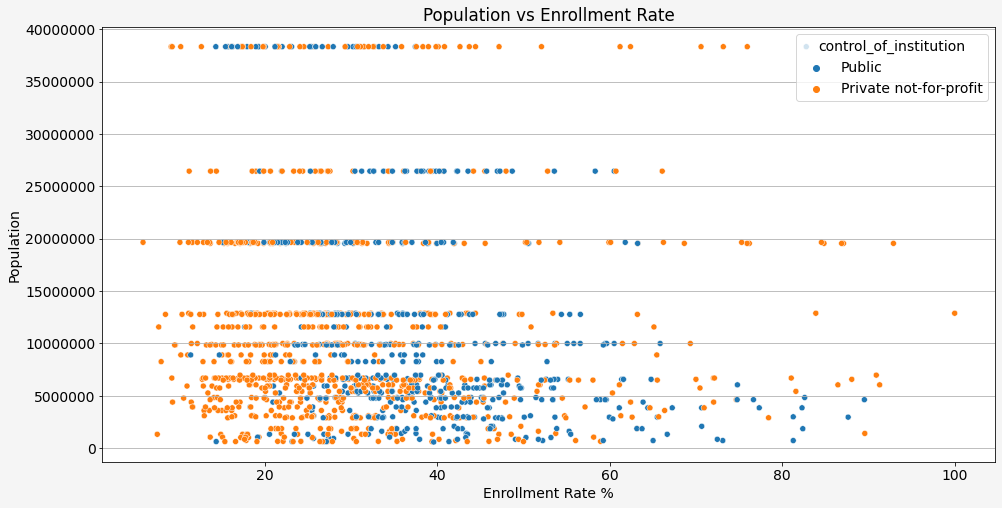

In [ ]:
plt.figure(figsize=(16,8))
ax=sns.scatterplot(y='population',x='enrollment_rate',data=universitiesnw_df,hue='control_of_institution');
plt.title('Population vs Enrollment Rate')
plt.grid(axis='y')
ax.ticklabel_format(style='plain')
plt.ylabel('Population')
plt.xlabel('Enrollment Rate %');

When it comes to population and enrollment rate, in general, there is not a strong tendency; however, we see that a few universities from low-population states have the highest enrollment rates. Therefore, ***we can not conclude that students prefer universities because they belong to crowded American states.***

Another characteristic that could influence the students' preference is the economic position of the state where the student is going to pursue his degree. After all, after graduating, students will try to find a job, and it could be easier for them if there are good job opportunities in the same state where they studied. So the question would be:

#### Q: Do students prefer a university because it belongs to a state with a high GDP per capita?

First, let's add the information on the GDP of each American state.

In [ ]:
with open('states_gdp.csv') as file:
    gdp_df=pd.read_csv(file)

In [ ]:
gdp_df.head()

,code,state,gdp_million
0,1000,Alabama,191481.0
1,2000,Alaska,56622.8
2,4000,Arizona,275199.1
3,5000,Arkansas,114251.5
4,6000,California,2262771.2


In [ ]:
gdp_df.drop(columns=['code'],inplace=True)

In [ ]:
universitiesnw_df=universitiesnw_df.merge(gdp_df,on='state')

In [ ]:
universitiesnw_df[['state','gdp_million','population']].head()

,state,gdp_million,population
0,Alabama,191481.0,4833722
1,Alabama,191481.0,4833722
2,Alabama,191481.0,4833722
3,Alabama,191481.0,4833722
4,Alabama,191481.0,4833722


As we have the GDP of each state but we want to work with GDP per capita, we need to calculate this value.

In [ ]:
universitiesnw_df['gdp_capita']=universitiesnw_df.gdp_million/universitiesnw_df.population*1e6

Let's see the GDP per capita of each state.

In [ ]:
gdp_state_df=universitiesnw_df.groupby('state')[['region','gdp_capita']].mean().sort_values('gdp_capita',ascending=False)

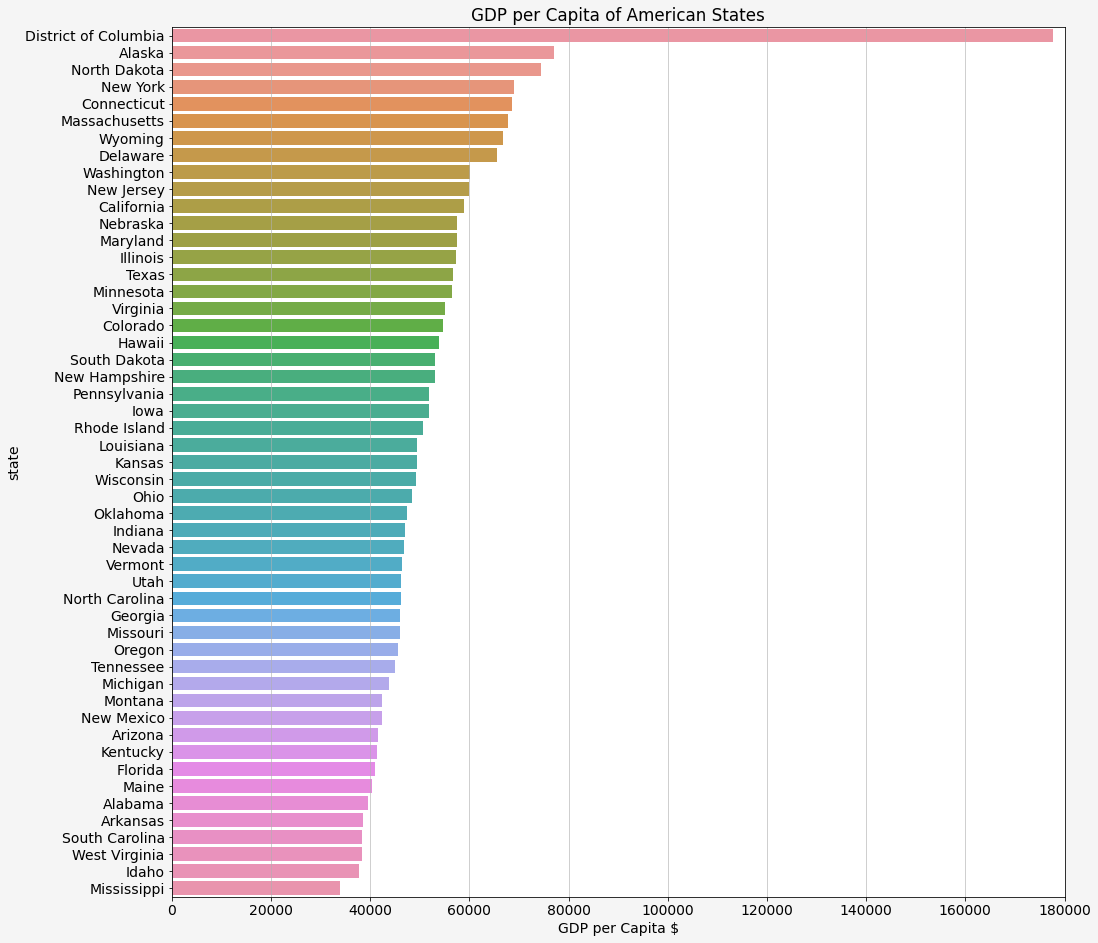

In [ ]:
plt.figure(figsize=(16,16))
ax=sns.barplot(x=gdp_state_df.gdp_capita,y=gdp_state_df.index);
ax.set_xlim((0,180000)); plt.title('GDP per Capita of American States'); plt.xlabel('GDP per Capita $');
plt.grid(axis='x',alpha=0.75)

The highest GDP per capita belongs to the District of Columbia, and the lowest one to Louisiana. It's essential to spot the immense gap between the highest GDP (from the District of Columbia) and the subsequent one (Alaska). Due to this enormous difference, we would need to keep in mind that the gap begins around $78000.

Now, let's see if we find a correlation between GDP per capita and enrollment rate.

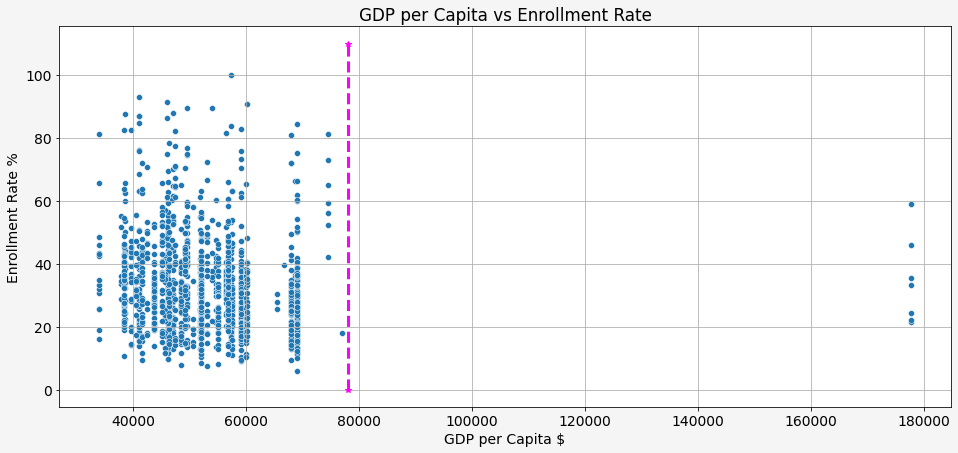

In [ ]:
plt.figure(figsize=(16,7))
sns.scatterplot(x='gdp_capita',y='enrollment_rate',data=universitiesnw_df);
plt.plot([78000,78000], [0, 110], c='magenta',lw=3,marker='*',ls='--')
plt.title('GDP per Capita vs Enrollment Rate')
plt.grid()
plt.xlabel('GDP per Capita $')
plt.ylabel('Enrollment Rate %');

A pink dashed line is showing where begins the gap of GDP's mentioned before.

We can see that the state with the highest GDP per capita, the District of Columbia, does not have the highest enrollment rates.

To get a better understanding of this image lets make a zoom, without the GDP of the District of Columbia.

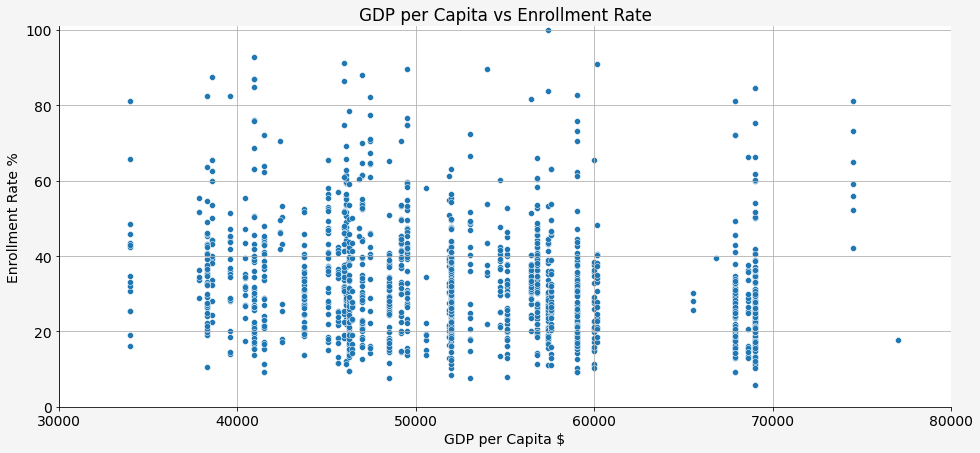

In [ ]:
plt.figure(figsize=(16,7))
sns.scatterplot(x='gdp_capita',y='enrollment_rate',data=universitiesnw_df);
plt.axis([30000,80000,0, 101]);
plt.grid();
plt.title('GDP per Capita vs Enrollment Rate')
plt.xlabel('GDP per Capita $')
plt.ylabel('Enrollment Rate %'); sns.despine();

The figure shows us that there is no relation between a high GDP per capita and a high enrollment rate. Consequently, we can say that ***students do not prefer a university because of the GDP per capita of the state where the university locates.***

As a final feature, we could think about future academic opportunities that could lead students to choose a university. Currently, there are many types of degrees that universities offer. 

In [ ]:
names=universitiesnw_df.columns[universitiesnw_df.columns.str.startswith('offers')].values
degree=universitiesnw_df[universitiesnw_df[names]=='Yes'][names].count().sort_values(ascending=False)

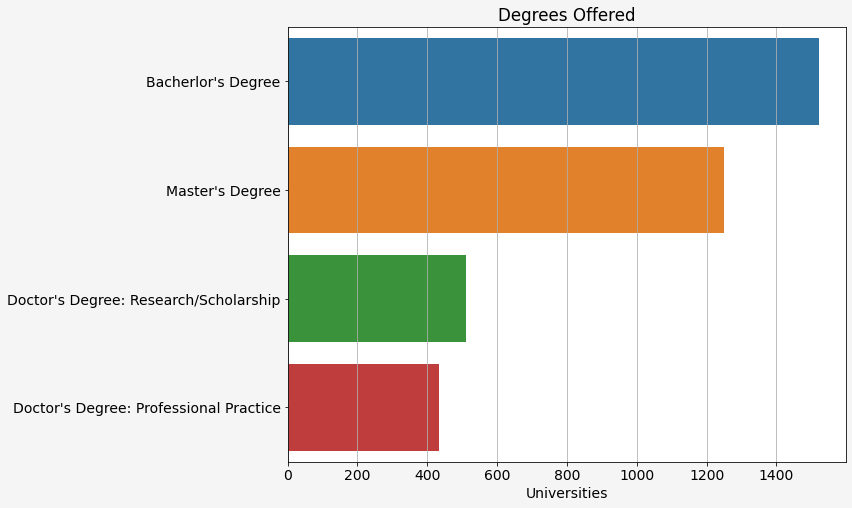

In [ ]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x=degree,y=degree.index)
ax.set_yticklabels(("Bacherlor's Degree","Master's Degree",
                    "Doctor's Degree: Research/Scholarship",
                    "Doctor's Degree: Professional Practice"));
plt.title('Degrees Offered')
plt.xlabel('Universities')
plt.grid(axis='x');

Therefore, we could ask: 

#### Q: Do students prefer a university based on the possibility of a higher, additional academic degree in the same university?

In [ ]:
hg_degree=universitiesnw_df.highest_degree_offered.value_counts()

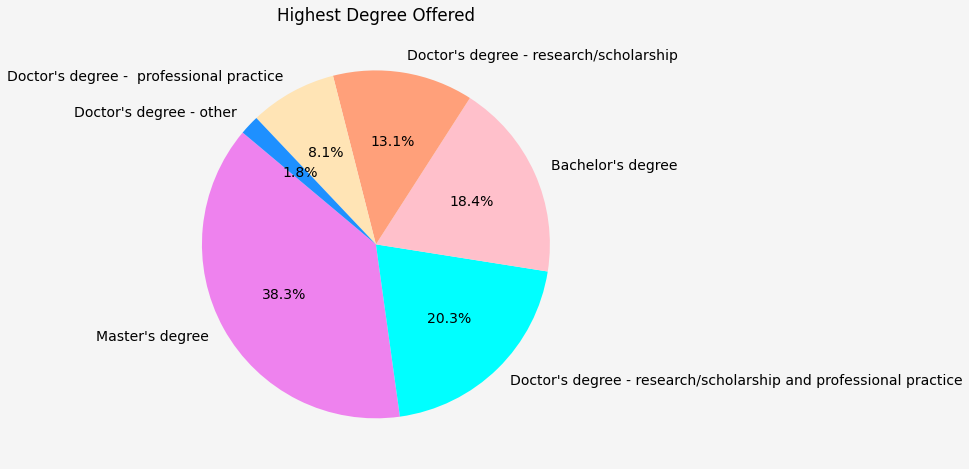

In [ ]:
plt.figure(figsize=(16,8))
plt.pie(hg_degree,labels=hg_degree.index,
       autopct='%.1f%%',startangle=140,colors = ['violet','aqua','pink','lightsalmon','moccasin','dodgerblue'])
plt.title('Highest Degree Offered');

The majority of universities offer up to a Master's degree. It's interesting to note that there is a high percentage of universities that offer only up to a Bachelor's degree.

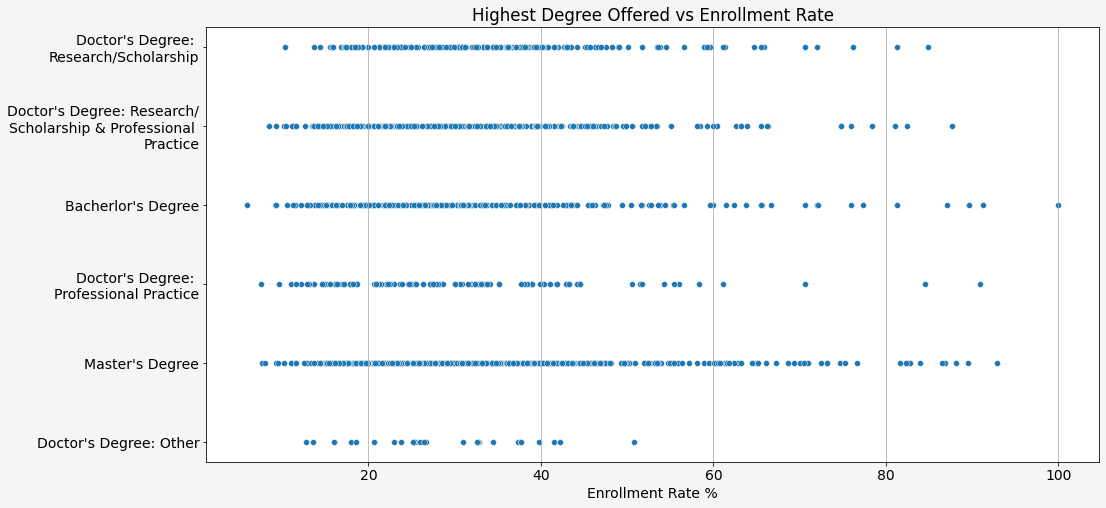

In [ ]:
plt.figure(figsize=(16,8))
ax=sns.scatterplot(y='highest_degree_offered',x='enrollment_rate',data=universitiesnw_df);
plt.title('Highest Degree Offered vs Enrollment Rate')
plt.ylabel('')
plt.xlabel('Enrollment Rate %')
plt.grid(axis='x')
ax.set_yticklabels(('''Doctor's Degree: 
Research/Scholarship''',
                    '''Doctor's Degree: Research/
Scholarship & Professional 
Practice''',
                    "Bacherlor's Degree",
                    '''Doctor's Degree: 
Professional Practice''',
                    "Master's Degree",
                    "Doctor's Degree: Other"));

There are several Doctor's degrees offered, and even though we join them, still, the trend is that, more frequently, universities that offer up to a Bachelor's degree or a Master's degree have high enrollment rates. Therefore, we could think that ***students do not necessarily look for a university thinking about the possibility of continuing a next degree in the same university.***

## 4. Inferences and Conclusions.

* A high number of applications does not imply that a university is preferred among students. In fact, the universities that receive a lower number of applications are the ones with a higher enrollment rate. Obviously, there are some exceptions, but this is the strongest tendency. 
* Based on the lack of a strong pattern among admissions and the enrollment rate, we can say that students do not necessarily prefer a university because of its high acceptance rate or, in other words, the students'preference is not based on how easy it is for them to be admitted to a university.

* By analyzing the enrollment rate, we saw that this rate, on average, is higher for public universities than the average for private universities. So, there is a strong students' preference for public universities.

* When it comes to tuition and fees, students prefer affordable universities. Additionally, the reason or one of the reasons for the students' preference for public universities is that public universities are much more affordable than the majority of private universities.

* In all the analyses made to find a pattern about costs for on-campus living, we found a high enrollment rate more frequently when costs are affordable. This means that students, in-state and out-state students, prefer universities with affordable costs of on-campus living.

* The majority of public universities offer a much more affordable price for in-state students than private universities.

*  The average cost of living for out-state students that public universities offer is higher than that for in-state students. However, the average cost that private universities offer does not make a distinction between in-state and out-state students.

* Since there was no firm trend when analyzing the state population with enrollment rates, we cannot say that students prefer universities of crowded states.

* Students do not prefer a university because of the GDP per capita of the state where the university locates. In other words, students do not choose a university based on the overall well-being of states.

* When students look for a university to study for a Bachelor's degree, they do not frequently choose the university thinking about a future possibility of pursuing a higher degree at the same university.

* To get more accurate results, it's necessary to have the information of other years, expand the number of universities, and add information about their ranking.

## 5. Future Work.


* A possible future work could make a similar analysis but making a stronger consideration about how the different degrees offered by universities can modify the features studied in this project, for instance, the tuition and fees, the living on campus, etc.

* It could also be interesting to see if the preference of undergraduate students differs from that of graduate students: a master's degree and a Ph.D.

* Another future analysis could take into consideration which are the most preferred universities among the different students' races. The original dataset contains information about the percentage of enrollment according to different races; however, hundreds of universities have missing values in these categories.

* A more accurate analysis should consider an enrollment rate for in-state students and another for out-state students.

## 6. References.

* https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas

* [1] https://blog.dataiku.com/2019/07/04/fundamental-steps-data-project-success
* https://apps.bea.gov/itable/iTable.cfm?ReqID=70&step=1#reqid=70&step=1&isuri=1 (GDP of the American states).
* https://realpython.com/pandas-python-explore-dataset/